# Đặt câu hỏi, phân tích và trả lời

**Câu hỏi:** `Nhà sản xuất` có là một phần quan trọng để tạo nên những bộ phim được đánh giá cao hay không?

**Lợi ích:** 
- Định hướng chiến lược sản xuất phim:
  + Có thể xác định được `Nhà sản xuất` nào phổ biến và có đánh giá cao, từ đó lựa chọn `Nhà sản xuất` phù hợp cho các dự án làm phim.
  + Việc hiểu rõ các yếu tố này sẽ giúp các đạo diễn lựa chọn `Nhà sản xuất` có tiềm năng thành công, giảm thiểu rủi ro trong sản xuất phim.
- Nâng cao sự hiểu biết về các yếu tố ảnh hưởng đến đánh giá phim: Câu hỏi này sẽ giúp bạn hiểu ngoài những yếu tố khác thì liệu `Nhà sản xuất` có phải là một yếu tố quan trọng ảnh hưởng đến sự thành công của một bộ phim hay không. Từ đó, có thể hình thành những hệ thống, mô hình sau này.

**Cách trả lời:**
- Xem xét điểm đánh giá trung bình của các `nhà sản xuất` để thấy được những `nhà sản xuất` có xu hướng tạo ra những bộ Anime có điểm đánh giá cao.
- Xem xét các `nhà sản xuất` phổ biến để xem mức độ phân hóa điểm như thế nào, có rõ ràng hay không và có điểm đánh giá cao hay không.
- Xem xét mối quan hệ giữa điểm đánh giá, số lượt đánh giá và số lượng phim để có cái nhìn tổng quan về các `nhà sản xuất`.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Đọc dữ liệu

In [10]:
df = pd.read_csv('./anime_preprocessing.csv')
print(df.isnull().sum())

ID                    0
Title                 0
Episodes             78
Type                  0
Aired                 0
Producers             0
Studios               0
Source                0
Genres                0
Duration (mins)      15
Score                 0
Scored By             0
Rank               3889
Popularity            0
Year                  0
dtype: int64


## Xử lý

In [11]:
# Xóa toàn bộ dòng có giá trị NULL
cleaned_df = df.dropna()
print(cleaned_df.isnull().sum())  # Kiểm tra số lượng giá trị NULL còn lại
print(cleaned_df.shape)          # Kiểm tra kích thước dữ liệu sau khi làm sạch

ID                 0
Title              0
Episodes           0
Type               0
Aired              0
Producers          0
Studios            0
Source             0
Genres             0
Duration (mins)    0
Score              0
Scored By          0
Rank               0
Popularity         0
Year               0
dtype: int64
(12987, 15)


In [13]:
# Tính phần trăm các giá trị "Unknown" trong cột "Producers"
unknown_producers_count = cleaned_df[cleaned_df['Producers'] == 'UNKNOWN'].shape[0]  # Đếm số dòng có giá trị "UNKNOWN"
total_producers_count = cleaned_df.shape[0]  # Tổng số dòng
unknown_producers_percent = (unknown_producers_count / total_producers_count) * 100  # Tính phần trăm

# In kết quả
print(f"Phần trăm các giá trị 'UNKNOWN' trong cột 'Producers': {unknown_producers_percent:.2f}%")

Phần trăm các giá trị 'UNKNOWN' trong cột 'Producers': 37.80%


Số lượng giá trị "UNKNOWN" là khá lớn, cho thấy đa phần các phim chưa đề cập rõ ràng về `nhà sản xuất`, tuy nhiên, các dòng này cũng không cung cấp giá trị để chúng ta phân tích nên ta sẽ xóa các dòng "UNKNOWN" này.

In [15]:
cleaned_df = cleaned_df[cleaned_df['Producers'] != 'UNKNOWN']

In [17]:
# Check kết quả
print(cleaned_df[cleaned_df['Producers'] == 'UNKNOWN'].shape[0])

0


Giá trị trong cột Producers là 1 chuỗi với nhiều Producer khác nhau, vì vậy, nếu phân tích với nguyên chuỗi như thế này sẽ ảnh hưởng đến kết quả phân tích theo từng nhóm Producer khác nhau. Do đó, ta sẽ tách các Producers trong cùng 1 ô ra để dễ phân tích hơn.

In [20]:
cleaned_df['Producers'] = cleaned_df['Producers'].str.split(', ')
cleaned_df = cleaned_df.explode('Producers')
cleaned_df.head()
#Xem thử kết quả sau khi explode

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration (mins),Score,Scored By,Rank,Popularity,Year
0,1.0,Cowboy Bebop,26.0,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24.0,8.75,988000.0,482.0,43.0,1998.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001",Sunrise,Bones,Original,"Action, Sci-Fi",115.0,8.38,219779.0,2092.0,631.0,2001.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001",Bandai Visual,Bones,Original,"Action, Sci-Fi",115.0,8.38,219779.0,2092.0,631.0,2001.0
2,6.0,Trigun,26.0,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24.0,8.22,380049.0,3602.0,258.0,1998.0
3,7.0,Witch Hunter Robin,26.0,TV,"Jul 3, 2002 to Dec 25, 2002",Bandai Visual,Sunrise,Original,"Action, Drama, Mystery, Supernatural",25.0,7.24,44600.0,30982.0,1908.0,2002.0


## Phân tích

### Biểu đồ 1: Xây dựng điểm đánh giá trung bình của các `nhà sản xuất`

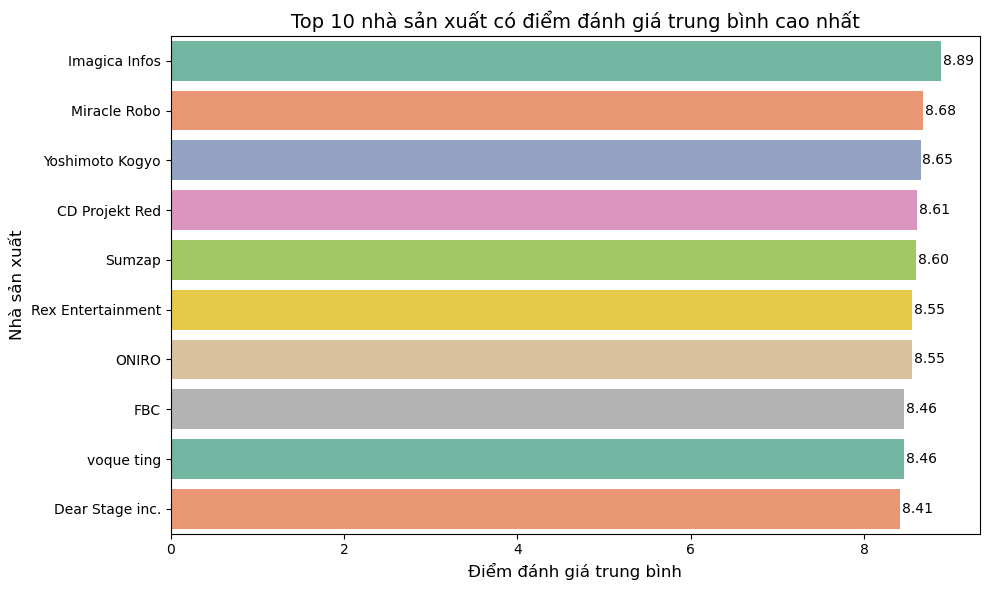

In [21]:
# Tính trung bình điểm số của từng Nhà sản xuất (Producers)
top_producers = (cleaned_df.groupby('Producers')['Score'].mean().sort_values(ascending=False).head(10))

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_producers.values, y=top_producers.index, hue=top_producers.index, palette="Set2", dodge=False)

# Thêm giá trị điểm trung bình vào các thanh
for i in range(len(top_producers)):
    ax.text(top_producers.values[i] + 0.02, i, f'{top_producers.values[i]:.2f}', ha='left', va='center', fontsize=10)

# Tiêu đề và nhãn trục
plt.title('Top 10 nhà sản xuất có điểm đánh giá trung bình cao nhất', fontsize=14)
plt.xlabel('Điểm đánh giá trung bình', fontsize=12)
plt.ylabel('Nhà sản xuất', fontsize=12)

plt.tight_layout()
plt.show()

In [28]:
# Tính điểm trung bình và số lượng phim của từng nhà sản xuất
producers_stats = cleaned_df.groupby('Producers').agg(
    avg_score=('Score', 'mean'),  # Điểm trung bình
    num_movies=('Producers', 'size')  # Số lượng phim
).reset_index()

# Sắp xếp theo điểm trung bình giảm dần
producers_stats_sorted = producers_stats.sort_values(by='avg_score', ascending=False)

# Lấy top nhà sản xuất có điểm đánh giá trung bình cao nhất (ví dụ: top 10)
top_producers_high_score = producers_stats_sorted.head(10)

# Hiển thị kết quả
print(top_producers_high_score)

              Producers  avg_score  num_movies
545       Imagica Infos   8.890000           1
738        Miracle Robo   8.680000           3
1315    Yoshimoto Kogyo   8.650000           1
198      CD Projekt Red   8.610000           1
1104             Sumzap   8.596667           3
912   Rex Entertainment   8.550000           1
822               ONIRO   8.550000           1
361                 FBC   8.460000           1
1374         voque ting   8.460000           3
301     Dear Stage inc.   8.410000           1


### Biểu đồ 2: Phân phối điểm số của các `nhà sản xuất`

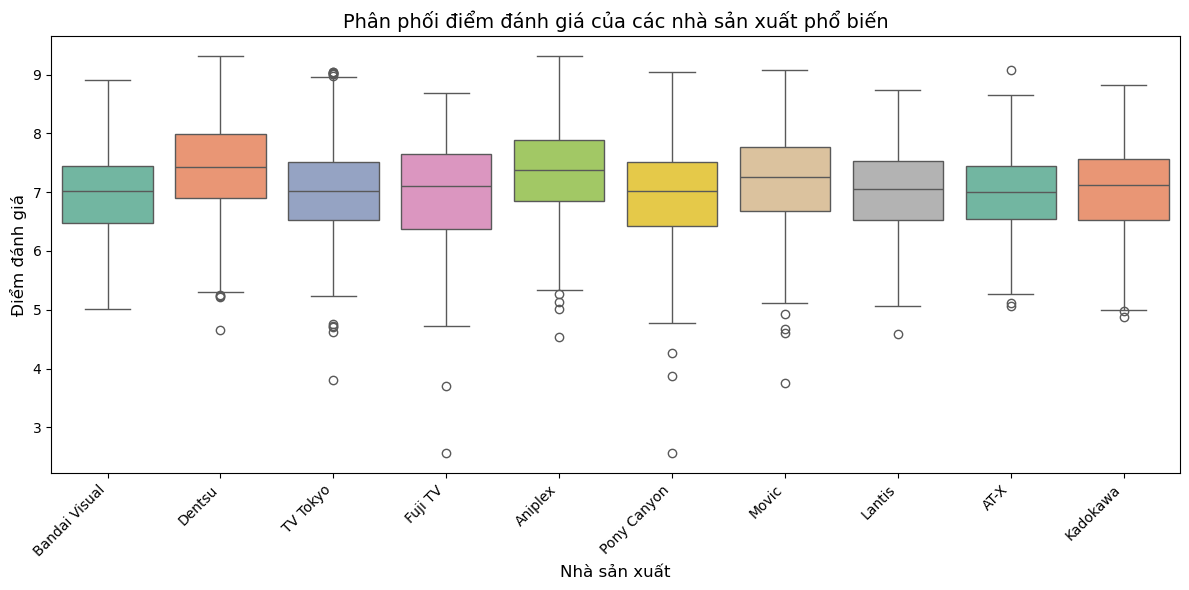

In [22]:
# Lấy top các nhà sản xuất có nhiều bộ phim nhất
producers_counts = cleaned_df['Producers'].value_counts()
top_producers = producers_counts.head(10).index
filtered_df = cleaned_df[cleaned_df['Producers'].isin(top_producers)]

# Vẽ biểu đồ hộp
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Producers', y='Score', hue='Producers', palette='Set2', dodge=False)

plt.title('Phân phối điểm đánh giá của các nhà sản xuất phổ biến', fontsize=14)
plt.xlabel('Nhà sản xuất', fontsize=12)
plt.ylabel('Điểm đánh giá', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Biểu đồ 3: Mối quan hệ giữa số lượng phim, điểm trung bình và số lượt đánh giá của nhóm nhà sản xuất có điểm đánh giá trung bình cao nhất và nhóm nhà sản xuất phổ biến nhất

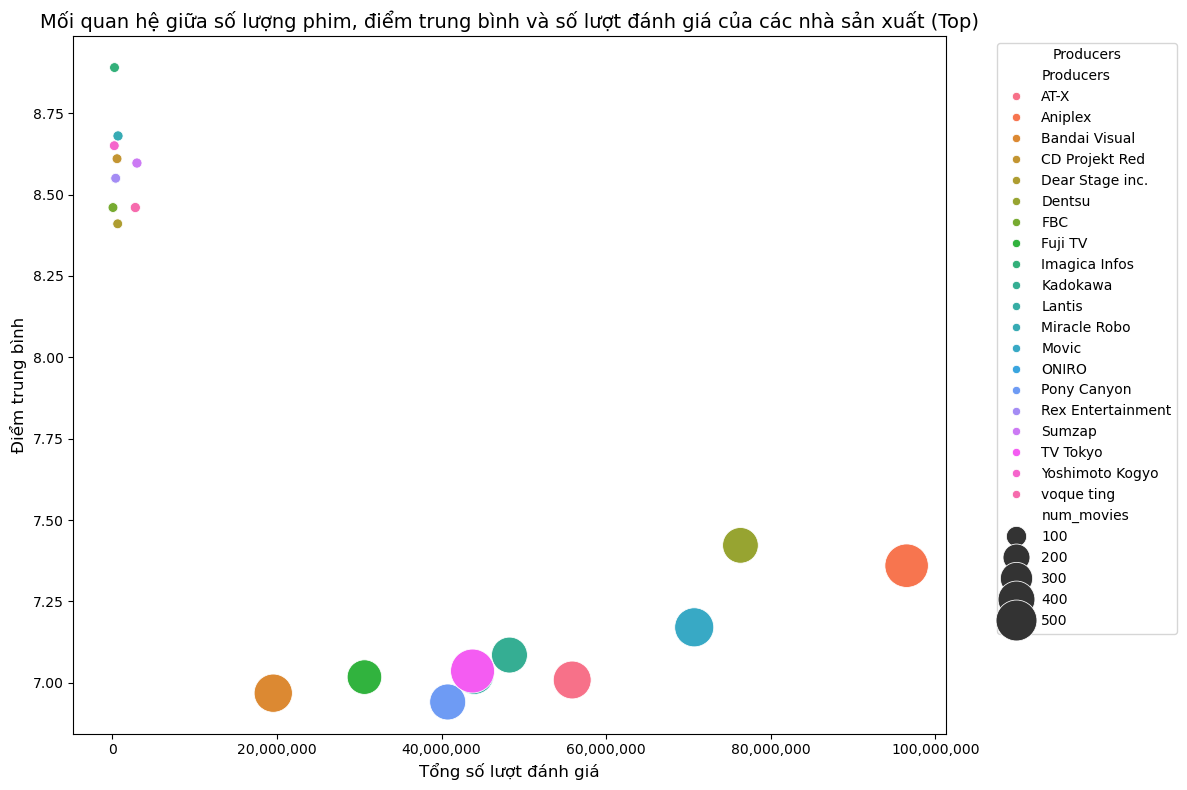

In [30]:
import matplotlib.ticker as ticker

# Tính top nhà sản xuất theo điểm trung bình
top_score_producers = (
    cleaned_df.groupby('Producers')['Score'].mean()
    .sort_values(ascending=False)
    .head(10).index
)

# Tính top nhà sản xuất theo số lượng phim
top_count_producers = cleaned_df['Producers'].value_counts().head(10).index

# Kết hợp hai danh sách
top_producers = set(top_score_producers).union(top_count_producers)

# Lọc dữ liệu cho các nhà sản xuất này
filtered_df = cleaned_df[cleaned_df['Producers'].isin(top_producers)]

# Tính số lượng phim, điểm trung bình, tổng số lượt đánh giá
producers_stats = filtered_df.groupby('Producers').agg(
    num_movies=('Producers', 'size'),
    avg_score=('Score', 'mean'),
    total_reviews=('Scored By', 'sum')
).reset_index()

# Vẽ biểu đồ Bubble Plot
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(
    data=producers_stats,
    x='total_reviews',
    y='avg_score',
    size='num_movies',
    sizes=(50, 1000),
    hue='Producers',
    palette=sns.color_palette("husl", len(producers_stats)),
    legend='brief'
)

# Tùy chỉnh tiêu đề và nhãn
plt.title('Mối quan hệ giữa số lượng phim, điểm trung bình và số lượt đánh giá của các nhà sản xuất (Top)', fontsize=14)
plt.xlabel('Tổng số lượt đánh giá', fontsize=12)
plt.ylabel('Điểm trung bình', fontsize=12)

# Định dạng trục x để hiển thị rõ số lớn
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Thêm dấu phẩy ngăn cách hàng nghìn

# Cấu hình legend
handles, labels = bubble_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Producers', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Tinh chỉnh bố cục
plt.tight_layout()
plt.show()

## Kết luận

- Biểu đồ 1: Top 10 nhà sản xuất có điểm đánh giá trung bình cao nhất
  + Quan sát:
    + Imagica Infos đứng đầu với điểm đánh giá trung bình cao nhất, đạt 8.89.
    + Miracle Robo (8.68), Yoshimoto Kogyo (8.65), và CD Projekt Red (8.61) lần lượt xếp sau, với điểm đánh giá không quá chênh lệch.
    + Các nhà sản xuất từ thứ 5 đến thứ 10 có điểm đánh giá từ 8.60 đến 8.41.
    + Chênh lệch giữa nhà sản xuất cao nhất (8.89) và thấp nhất trong top 10 (8.41) là 0.48, cho thấy mức độ cạnh tranh giữa các nhà sản xuất này tương đối sát sao.
    + Điểm đánh giá trung bình của top 10 nhà sản xuất đều trên 8, phản ánh chất lượng sản phẩm/dịch vụ của họ được đánh giá rất cao.
    + Imagica Infos nổi bật hơn so với phần còn lại, trong khi các nhà sản xuất còn lại (đặc biệt từ Sumzap đến Dear Stage inc.) có mức điểm gần nhau hơn, thể hiện sự đồng đều về chất lượng.
    + 1. Ảnh hưởng của số lượng phim đến điểm đánh giá:
Khi số lượng phim của một nhà sản xuất ít (chỉ từ 1 đến 3), điểm đánh giá trung bình có thể bị ảnh hưởng bởi sự thiên lệch:
Nếu một phim được đánh giá cao vượt trội, nó sẽ khiến điểm trung bình tăng lên đáng kể.
Ngược lại, nếu có nhiều phim hơn, điểm đánh giá trung bình sẽ phản ánh chính xác và toàn diện hơn về chất lượng của nhà sản xuất.
2. Rủi ro khi đánh giá chỉ dựa trên số lượng ít:
Tính đại diện thấp: Khi một nhà sản xuất có ít phim, điểm số không thể hiện được toàn bộ khả năng hoặc chất lượng lâu dài của họ. Ví dụ:
Một nhà sản xuất có một phim đạt điểm cao không đồng nghĩa rằng mọi sản phẩm trong tương lai sẽ duy trì chất lượng đó.
Hiệu ứng may mắn: Một hoặc hai dự án thành công vượt trội có thể làm lu mờ các điểm yếu khác của nhà sản xuất.
3. Ý nghĩa với các nhà sản xuất trong biểu đồ:
Các nhà sản xuất như Imagica Infos (8.89) hoặc Miracle Robo (8.68) có thể đã đạt được điểm cao do đầu tư mạnh vào một hoặc vài dự án chất lượng vượt trội.
Ngược lại, một số nhà sản xuất như Sumzap (8.60) hoặc Dear Stage inc. (8.41) có thể duy trì chất lượng đồng đều, nhưng không có dự án nào vượt trội đến mức tạo điểm số cực cao.
4. Lời khuyên khi sử dụng dữ liệu:
Không nên chỉ dựa vào điểm trung bình: Để đánh giá chính xác, cần xem xét cả số lượng phim lẫn phân bố điểm số của từng nhà sản xuất.
Ví dụ: Một nhà sản xuất có ít phim nhưng đạt điểm cao không chắc chắn sẽ duy trì thành công trong các dự án sau này.
Kết hợp thêm dữ liệu định tính: Nên xem xét các yếu tố khác như quy mô sản xuất, ngân sách đầu tư, và mức độ phổ biến của phim.
5. Kết luận:
Số lượng phim ít có thể khiến kết quả trở nên không đồng đều và khó so sánh một cách toàn diện giữa các nhà sản xuất. Các nhà sản xuất trong biểu đồ tuy được đánh giá cao, nhưng cần thời gian và số lượng sản phẩm lớn hơn để khẳng định vị trí bền vững trong ngành.
  + Ý nghĩa: 
- Biểu đồ 2: Phân phối điểm đánh giá của các nhà sản xuất phổ biến
  + Quan sát:
    + 
  + Ý nghĩa: 
- Biểu đồ 3: Mối quan hệ giữa số lượng phim, điểm trung bình và số lượt đánh giá của nhóm nhà sản xuất có điểm đánh giá trung bình cao nhất và nhóm nhà sản xuất phổ biến nhất
  + Quan sát:
    + 
    + 
  + Ý nghĩa: 
- Kết luận: 